In [1]:
import torchvision
import numpy as np
import Viz.Plots as plot
import Viz.Results as res

# Aufgabe 1

## Laden der MNIST-Datensätze

Zur Durchführung von maschinellem Lernen mit dem MNIST-Datensatz von handgeschriebenen Ziffern, laden wir zunächst die Trainings- und Testdatensätze herunter. Die Bibliothek `torchvision` wird verwendet, um den MNIST-Datensatz zu beziehen. Der Parameter `train=True` spezifiziert, dass wir den Trainingsdatensatz herunterladen möchten, während `train=False` für den Testdatensatz steht.

### Umwandlung in NumPy-Arrays

Nach dem Herunterladen der Daten werden die Bilder und Labels der Datensätze in NumPy-Arrays umgewandelt. Dies ermöglicht eine einfachere Manipulation und Verarbeitung der Daten für Trainings- und Testzwecke. 

- `train_images` und `train_labels` enthalten die Bilder und Labels des Trainingsdatensatzes.
- `test_images` und `test_labels` enthalten die Bilder und Labels des Testdatensatzes.

In [2]:
#load Train- and Test-Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Convert images and labels to NumPy arrays
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

## Visualisierung der MNIST-Daten

Nach dem Laden des MNIST-Datensatzes ist es nützlich, die Verteilung der verschiedenen Klassen zu visualisieren und einige Beispiele von handgeschriebenen Ziffern anzusehen. Dies hilft, ein intuitives Verständnis für die Daten zu entwickeln, mit denen das Modell trainiert wird.

Im Trainingsdatensatz sind 60'000 und im Test 10'000 Bilder enthalten. Sie sind jeweils 28x28 Pixel gross.

### Verteilung der Ziffern im Trainingsdatensatz

Das erste Bild zeigt ein Balkendiagramm, das die Anzahl der Bilder für jede Ziffer im Trainingsdatensatz darstellt. Dies ist wichtig, um zu verstehen, wie gut der Datensatz über die verschiedenen Klassen hinweg ausbalanciert ist. Ein ausgeglichener Datensatz hat in der Regel eine gleichmäßige Verteilung der Beispiele über alle Klassen, was zu einem ausgewogeneren Training des Modells führt.

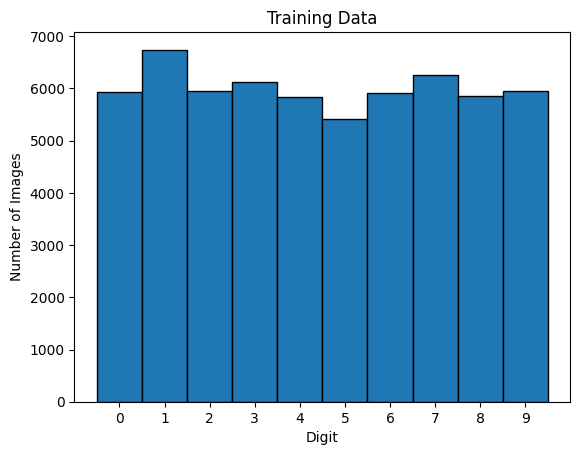

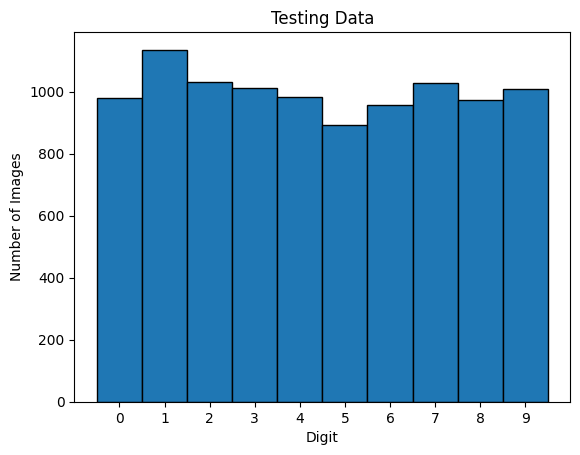

In [3]:
plot.show_hist(train_labels, 'Training Data')
plot.show_hist(test_labels, 'Testing Data')

### Beispiele der handgeschriebenen Ziffern

Das zweite Bild zeigt eine Rasteransicht von Beispielen handgeschriebener Ziffern, geordnet nach Label. Jede Reihe repräsentiert eine Klasse von Ziffern (0 bis 9), und jede Spalte zeigt verschiedene Variationen der jeweiligen Ziffer. Diese Visualisierung verdeutlicht die Vielfalt in der Art und Weise, wie verschiedene Personen die gleichen Ziffern schreiben, was die Herausforderung des Klassifizierens dieser Bilder unterstreicht.

Diese Einsichten sind entscheidend für die Vorbereitung und das Feintuning der Bilderkennungsalgorithmen, die später eingesetzt werden, um die Ziffern in den Bildern zu identifizieren und zu klassifizieren.


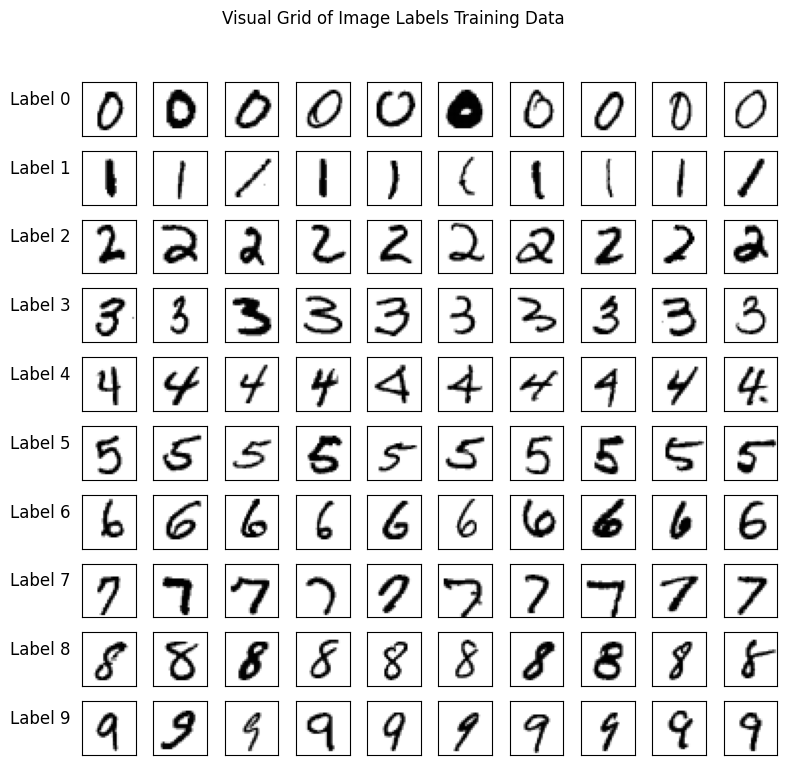

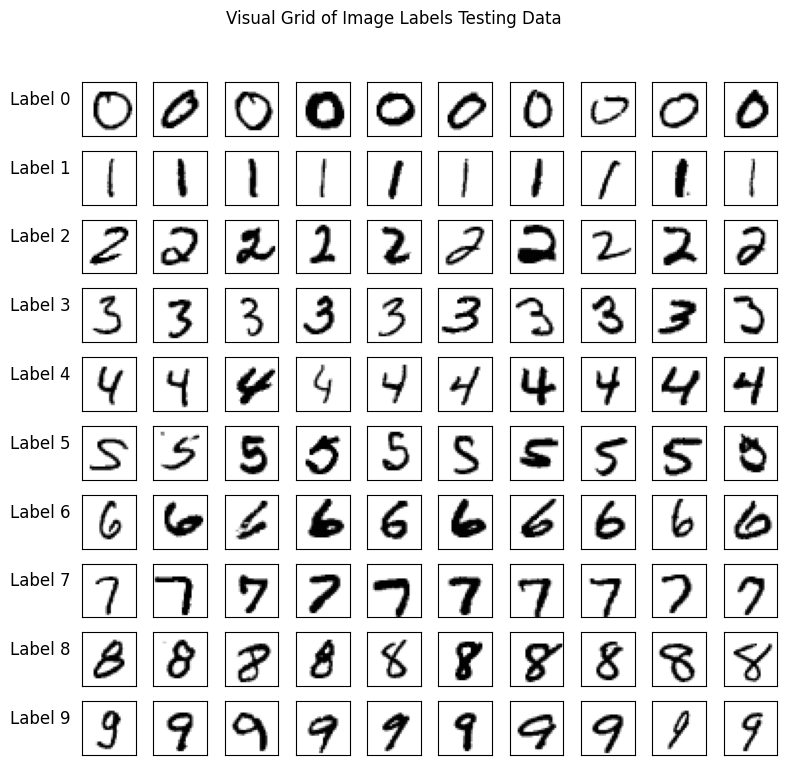

In [4]:
plot.show_image_matrix(train_images, train_labels, 'Training Data')
plot.show_image_matrix(test_images, test_labels, 'Testing Data')

# Aufgabe 2

## LinearLayer-Klasse

- **Zweck**: Stellt eine einzelne Schicht im Netzwerk dar, die fähig ist, lineare Transformationen durchzuführen und Parameter zu aktualisieren.
- **Schlüsselattribute**:
  - `weights`: Gewichtsmatrix, initialisiert mit der Xavier-Initialisierung.
  - `bias`: Bias-Vektor, initialisiert auf null.
  - `learning_rate`: Lernrate, die zur Aktualisierung der Parameter verwendet wird.
- **Schlüsselmethoden**:
  - `forward_pass(input_data)`: Berechnet die Ausgabe der Schicht, gegeben die Eingabedaten.
  - `backward_pass(input_data, output_gradient)`: Berechnet Gradienten, die für das Lernen benötigt werden.
  - `parameter_update(weight_gradient, bias_gradient)`: Aktualisiert die Gewichte und Biases der Schicht basierend auf Gradienten.

In [5]:
import Classes.LinearLayer_Test as linlayer_test
import unittest

# Create TestSuite
suite = unittest.TestLoader().loadTestsFromModule(linlayer_test)
# Run TestSuite
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

test_backward_pass (Classes.LinearLayer_Test.TestLinearLayer.test_backward_pass) ... ok
test_forward_pass (Classes.LinearLayer_Test.TestLinearLayer.test_forward_pass) ... ok
test_parameter_update (Classes.LinearLayer_Test.TestLinearLayer.test_parameter_update) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.104s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Testfälle für die LinearLayer-Klasse

### Test des Forward-Passes

Die Funktion `test_forward_pass` testet die Forward-Pass-Berechnung der `LinearLayer`.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`

Die erwartete Ausgabe `A_expected` wird wie folgt berechnet:

$$
A_{\text{expected}} = \text{Eingabe} \cdot \text{Gewichte}^T + \text{Bias}
$$

Durch manuelles Berechnen der Matrixoperationen:

$$
A_{\text{expected}} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \cdot \begin{bmatrix} 0.1 & 0.3 \\ 0.2 & 0.4 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 1.0 \end{bmatrix} = \begin{bmatrix} 1.0 & 1.6 \\ 2.1 & 3.5 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test des Backward-Passes

Die Funktion `test_backward_pass` prüft den Backward-Pass der `LinearLayer`-Klasse, bei dem die Gradienten in Bezug auf die Eingaben und Parameter der Schicht berechnet werden. Dieser Test verwendet festgelegte Eingabedaten und vorgegebene Gewichte, um die Korrektheit der berechneten Gradienten zu überprüfen.

#### Gegeben

- **Eingabedaten**: `[[1, 2], [3, 4]]`
- **Gewichte**: `[[0.1, 0.2], [0.3, 0.4]]`
- **Bias**: `[0.5, 1.0]` (als 1D-Array angepasst, um dem Design der `LinearLayer`-Klasse zu entsprechen)
- **Ausgabegradient** (willkürlich für den Test): `[[0.5, 0.6], [0.7, 0.8]]`

#### Berechnung der erwarteten Gradienten

##### Eingabegradient (expected_dA)

Der Eingabegradient `expected_dA` wird als Produkt des Ausgabegradienten und der Gewichte berechnet:

$$
\text{expected\_dA} = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \times \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}
$$

$$
\text{expected\_dA} = \begin{bmatrix} 0.23 & 0.34 \\ 0.31 & 0.46 \end{bmatrix}
$$

##### Gewichtegradient (expected_weight_gradient)

Der Gewichtegradient `expected_weight_gradient` wird als Produkt der transponierten Ausgabegradienten und des Eingabedaten berechnet:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 0.5 & 0.7 \\ 0.6 & 0.8 \end{bmatrix}^T \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

Nach der Korrektur und Neuberechnung:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 2.6 & 3.8 \\ 3.0 & 4.4 \end{bmatrix}
$$

##### Biasgradient (expected_bias_gradient)

Der Biasgradient `expected_bias_gradient` wird als Summe der Zeilen des Ausgabegradienten berechnet:

$$
\text{expected\_bias\_gradient} = \sum \begin{bmatrix} 0.5 + 0.7 \\ 0.6 + 0.8 \end{bmatrix} = \begin{bmatrix} 1.2 \\ 1.4 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test der Parameteraktualisierung

Die Funktion `test_parameter_update` testet die Aktualisierung von Parametern mithilfe von Gradienten und einer Lernrate.

Gegeben:
- Anfängliche Gewichte: `[[0.5, 0.7], [0.3, 0.4]]`
- Anfänglicher Bias: `[[0.1], [0.2]]`
- Gewichtegradient: `[[-0.2, 0.1], [0.3, -0.1]]`
- Biasgradient: `[[-0.05], [0.03]]`
- Lernrate: `0.1`

Die erwarteten aktualisierten Gewichte und Bias werden wie folgt berechnet:

$$
\text{Erwartete Gewichte} = \text{Anfängliche Gewichte} - \text{Lernrate} \times \text{Gewichtegradient}
$$
$$
\text{Erwarteter Bias} = \text{Anfänglicher Bias} - \text{Lernrate} \times \text{Biasgradient}
$$

Durch manuelle Anwendung der Aktualisierungsregel:

$$
\text{Erwartete Gewichte} = \begin{bmatrix} 0.5 & 0.7 \\ 0.3 & 0.4 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.2 & 0.1 \\ 0.3 & -0.1 \end{bmatrix}
$$
$$
\text{Erwarteter Bias} = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.05 \\ 0.03 \end{bmatrix}
$$

Der Test bestätigt, dass die Funktion zur Parameteraktualisierung die Gewichte und den Bias entsprechend den Gradienten und der Lernrate korrekt anpasst.



# Aufgabe 3

### NeuralNetwork-Klasse

- **Zweck**: Verwaltet die gesamte Netzwerkarchitektur einschließlich mehrerer Schichten sowie Vorwärts- und Rückwärtspropagation.
- **Schlüsselattribute**:
  - `input_dim`: Größe der Eingabedaten.
  - `hidden_dim`: Größe jeder versteckten Schicht.
  - `output_dim`: Größe der Ausgabeschicht.
  - `learning_rate`: Lernrate für das Training des Netzwerks.
  - `hidden_layers`: Eine Liste von `LinearLayer`-Instanzen, die die versteckten Schichten darstellen.
  - `output_layer`: Eine einzelne `LinearLayer`-Instanz, die als Ausgabeschicht dient.
- **Schlüsselmethoden**:
  - `forward_pass(input_data)`: Verarbeitet die Eingabe durch das Netzwerk und gibt die Ausgabe zurück.
  - `backward_pass(input_data, output_gradient)`: Leitet Fehler zurück durch das Netzwerk, um Gewichte zu aktualisieren.
  - `parameter_update(gradients, output_gradients)`: Wendet berechnete Gradienten an, um die Parameter des Netzwerks zu aktualisieren.


### Funktionsbeschreibung

- Die Klasse `NeuralNetwork` konstruiert eine Reihe von linearen Schichten und verwaltet den Datenfluss durch diese Schichten während der Vorwärts- und Rückwärtsdurchläufe.
- Jede `LinearLayer` ist verantwortlich für eine einzelne lineare Transformation: Berechnung gewichteter Eingaben plus Biases und anschließende Aktualisierung dieser Parameter während des Trainings.
- Aktivierungsfunktionen wie Sigmoid oder Softmax werden extern auf die Schichten angewendet, was Flexibilität im Netzwerkdesign und in der Funktionalität ermöglicht.

In [6]:
# Normalize images
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Convert labels for binary classification (1 for digit 5, 0 for all other digits)
digit = 5
binary_train_labels = (train_labels == digit).astype(np.float32).reshape(-1, 1)
binary_test_labels = (test_labels == digit).astype(np.float32).reshape(-1, 1)

# Flatten the images for simplicity (28x28 to 784 pixel)
binary_train_images = train_images.reshape(train_images.shape[0], -1)
binary_test_images = test_images.reshape(test_images.shape[0], -1)

## Trainingsmodell für binäre Klassifikation

### Modellstruktur und -training
- **Mini-Batch Gradientenabstieg**: Das Modell verwendet Mini-Batch Gradientenabstieg zur Optimierung. Dabei wird der Datensatz in kleinere Chargen (Batches) aufgeteilt, um den Gradienten effizienter zu berechnen und zu aktualisieren.
- **Durchmischung der Trainingsdaten**: Vor jedem Durchlauf (Epoch) werden die Trainingsdaten zufällig neu angeordnet, um die Reihenfolgeabhängigkeit zu minimieren und das Überlernen zu verhindern.

### Vorwärts- und Rückwärtsdurchlauf
- **Vorwärtsdurchlauf (Forward Pass)**: Das Modell berechnet die Vorhersagen basierend auf den aktuellen Gewichtungen.
- **Rückwärtsdurchlauf (Backward Pass)**: Nach der Berechnung der Vorhersagen wird der Fehler ermittelt und der Gradient der Verlustfunktion bezüglich der Parameter des Modells berechnet.

### Parameteraktualisierung
- **Aktualisierung der Parameter**: Die Parameter des Modells werden basierend auf den berechneten Gradienten aktualisiert, um die Leistung des Modells schrittweise zu verbessern.

### Leistungsbewertung
- **Bewertung des Modells**: Nach jedem Epoch wird das Modell sowohl mit den Trainingsdaten als auch mit den Testdaten bewertet, um den Verlust und die Genauigkeit zu ermitteln. Diese Metriken helfen dabei, die Leistung des Modells über die Zeit zu überwachen und zu verstehen.

### Zusatzinformationen
- Das Modell setzt voraus, dass Funktionen zur Berechnung des binären Kreuzentropieverlusts (`binary_cross_entropy`) und der Genauigkeit (`binary_compute_accuracy`) bereits implementiert sind.
- Diese Struktur ist typisch für maschinelles Lernen bei Aufgaben zur binären Klassifikation und hilft, das Verhalten und die Anpassung des Modells im Laufe der Zeit zu verstehen und zu optimieren.

## Kostenfunktion (Loss Function)

Für binäre Klassifikationsaufgaben ist die binäre Kreuzentropie (Binary Cross-Entropy, BCE) eine häufig verwendete Kostenfunktion. Sie ist definiert als:

$$
BCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Hierbei ist:
- $N$ die Anzahl der Beispiele im Datensatz,
- $y_i$ der tatsächliche Labelwert (0 oder 1) und
- $\hat{y}_i$ der vom Netzwerk vorhergesagte Wert.

Diese Funktion ist besonders geeignet, weil sie die Wahrscheinlichkeit, die durch die Sigmoid-Aktivierungsfunktion des Output-Knotens modelliert wird, direkt berücksichtigt und Strafen für falsche Klassifikationen auf eine Art und Weise anwendet, die gut mit dem Optimierungsprozess zusammenarbeitet.



## Evaluationsfunktion

Für die Bewertung der Modellleistung bei binärer Klassifikation ist die Genauigkeit (Accuracy) eine intuitive Metrik:

$$
\text{Accuracy} = \frac{\text{Anzahl der korrekt klassifizierten Beispiele}}{\text{Gesamtanzahl der Beispiele}}
$$

Diese Metrik ist einfach zu verstehen und gibt den Anteil der korrekt vorhergesagten Beispiele an der Gesamtzahl der Beispiele an.


## Alternative Optionen
### Evaluierungsmetriken:

- **Precision und Recall**: Precision misst das Verhältnis der korrekt positiv klassifizierten Instanzen zur Gesamtzahl der positiven Klassifizierungen, während Recall das Verhältnis der korrekt positiv klassifizierten Instanzen zur Gesamtzahl der tatsächlich positiven Instanzen misst. Diese Metriken sind besonders wichtig, wenn die Klassen im Datensatz stark unbalanciert sind.

- **F1-Score**: Der F1-Score kombiniert Precision und Recall zu einer einzigen Metrik und bietet somit ein ausgewogenes Maß für die Modellleistung, insbesondere wenn Precision und Recall in Konflikt stehen.

- **Kappa-Metrik**: Diese Metrik bewertet die Übereinstimmung zwischen zwei Klassifikatoren, was nützlich ist, wenn mehrere Modelle verglichen werden sollen oder wenn die Leistung eines Modells im Vergleich zu einer zufälligen Klassifikation bewertet werden soll.

- **AUC-ROC-Kurve**: Die Fläche unter der ROC-Kurve (AUC-ROC) misst die Leistungsfähigkeit des Modells, Sensitivität und Spezifität zu kompromittieren. Dies ist besonders nützlich, wenn Sie die Leistung des Modells über verschiedene Schwellenwerte betrachten möchten.

### Loss-Funktionen mit Kostenbezug:

- **Kostenmatrix**: Diese Matrix ermöglicht es, unterschiedliche Kosten für falsch positive und falsch negative Vorhersagen zu berücksichtigen, was besonders wichtig ist, wenn asymmetrische Kosten vorliegen oder wenn das Ziel ist, die Kosten bestimmter Fehler zu minimieren.

Indem man mehrere Metriken betrachtet, kann man ein umfassenderes Bild von der Leistung des Modells erhalten und besser entscheiden, welches Modell für die spezifische Aufgabe am besten geeignet ist.


## Aufgabe 4

### Bedeutung der Hyperparameter-Evaluation

Die systematische Evaluation von Hyperparametern wie der Lernrate (`lr`) und der Größe der versteckten Schicht (`hidden_size`) ist entscheidend für die Optimierung der Leistung eines neuronalen Netzwerks. 

Dieser Prozess ermöglicht es uns, empirisch zu bestimmen, welche Kombination dieser Parameter die beste Balance zwischen Lerneffizienz und Generalisierung bietet. Dies ist wichtig, um die Genauigkeit auf unbekannten Daten zu maximieren.

Durch das Testen verschiedener Konfigurationen können wir die Architektur des neuronalen Netzwerks feinjustieren. Dies passt das Modell optimal an die spezifischen Anforderungen der Aufgabe und die Struktur des Datensatzes an. Dadurch wird Overfitting vermieden und die Zuverlässigkeit des Modells verbessert.

In [7]:
import Train_Models.Binary_Train as bt

In [8]:
epochs = 20
batch_size = 64  # Example batch size
learning_rates = [0.01, 0.1, 1]
hidden_layer_sizes = [4, 8, 16]

# Call the function to evaluate all combinations
binary_evaluation_results = bt.binary_evaluate_combinations(
    binary_train_images, binary_train_labels, binary_test_images, binary_test_labels, epochs, batch_size, learning_rates, hidden_layer_sizes
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 0.07631868021852685, Test Loss: 0.07254282206904791, Train Accuracy: 0.9748666666666667, Test Accuracy: 0.9766
Epoch 2, Train Loss: 0.0635717652038062, Test Loss: 0.06039718363649191, Train Accuracy: 0.9803666666666667, Test Accuracy: 0.9809
Epoch 3, Train Loss: 0.047407517571106096, Test Loss: 0.04727351259258746, Train Accuracy: 0.98525, Test Accuracy: 0.9849
Epoch 4, Train Loss: 0.042863049564081664, Test Loss: 0.044317726689558516, Train Accuracy: 0.9869, Test Accuracy: 0.9848
Epoch 5, Train Loss: 0.040746959155642755, Test Loss: 0.04469667411142342, Train Accuracy: 0.9872, Test Accuracy: 0.9843
Epoch 6, Train Loss: 0.04033480368685866, Test Loss: 0.04214520295028888, Train Accuracy: 0.9867333333333334, Test Accuracy: 0.986
Epoch 7, Train Loss: 0.03946703184994838, Test Loss: 0.0453927127466657, Train Accuracy: 0.9871333333333333, Test Accuracy: 0.9855
Epoch 8, Train Loss: 0.03918003587306961, Tes

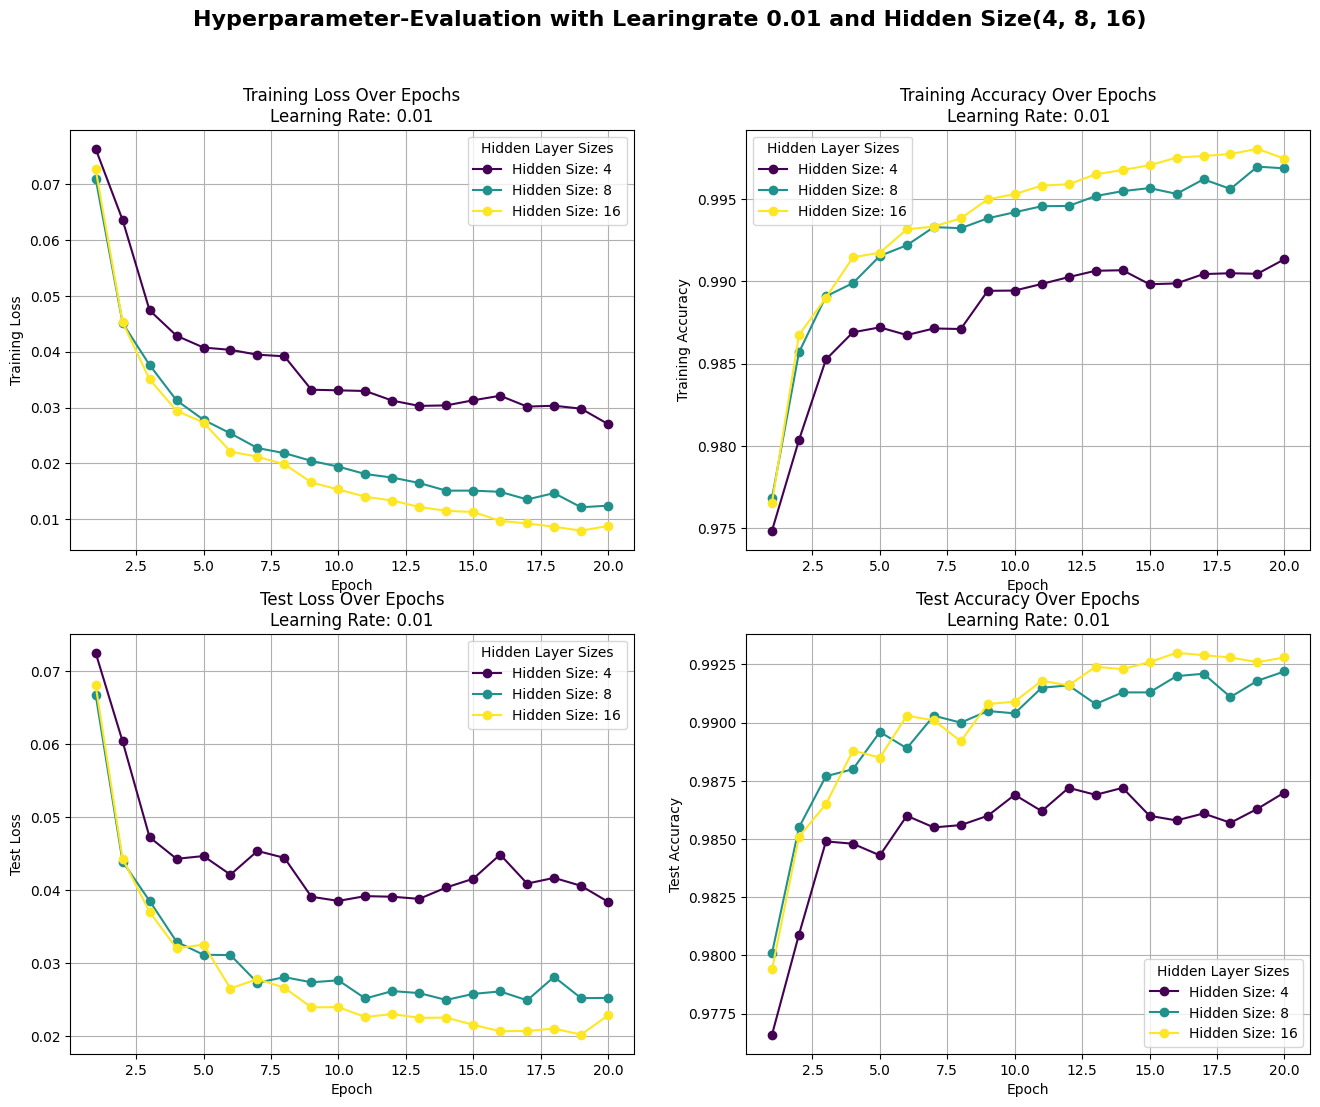

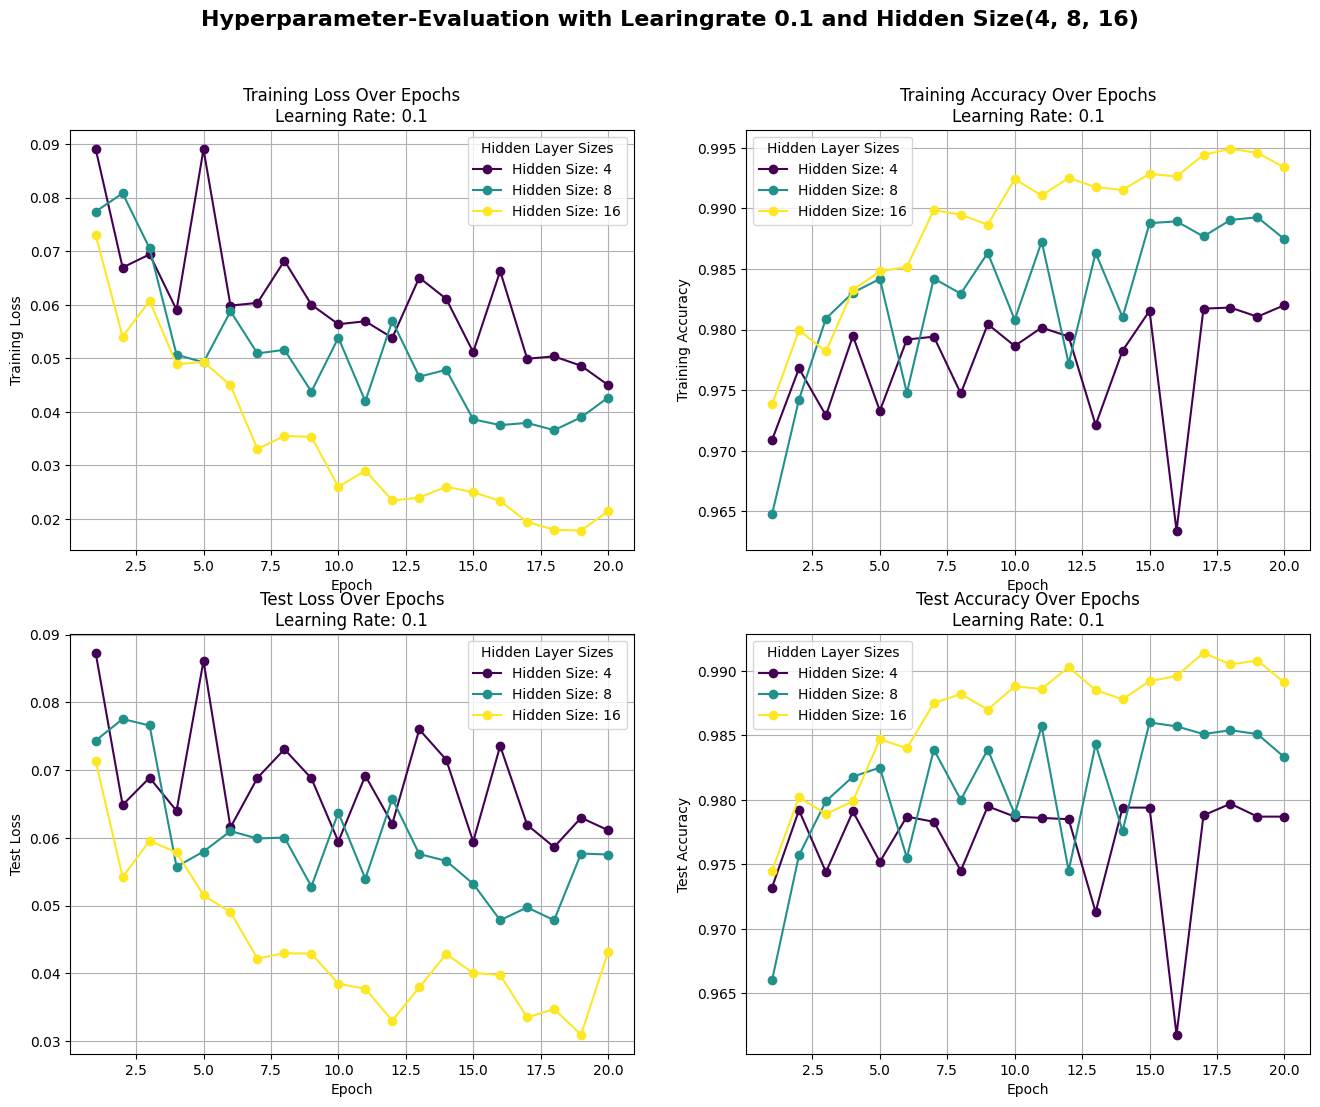

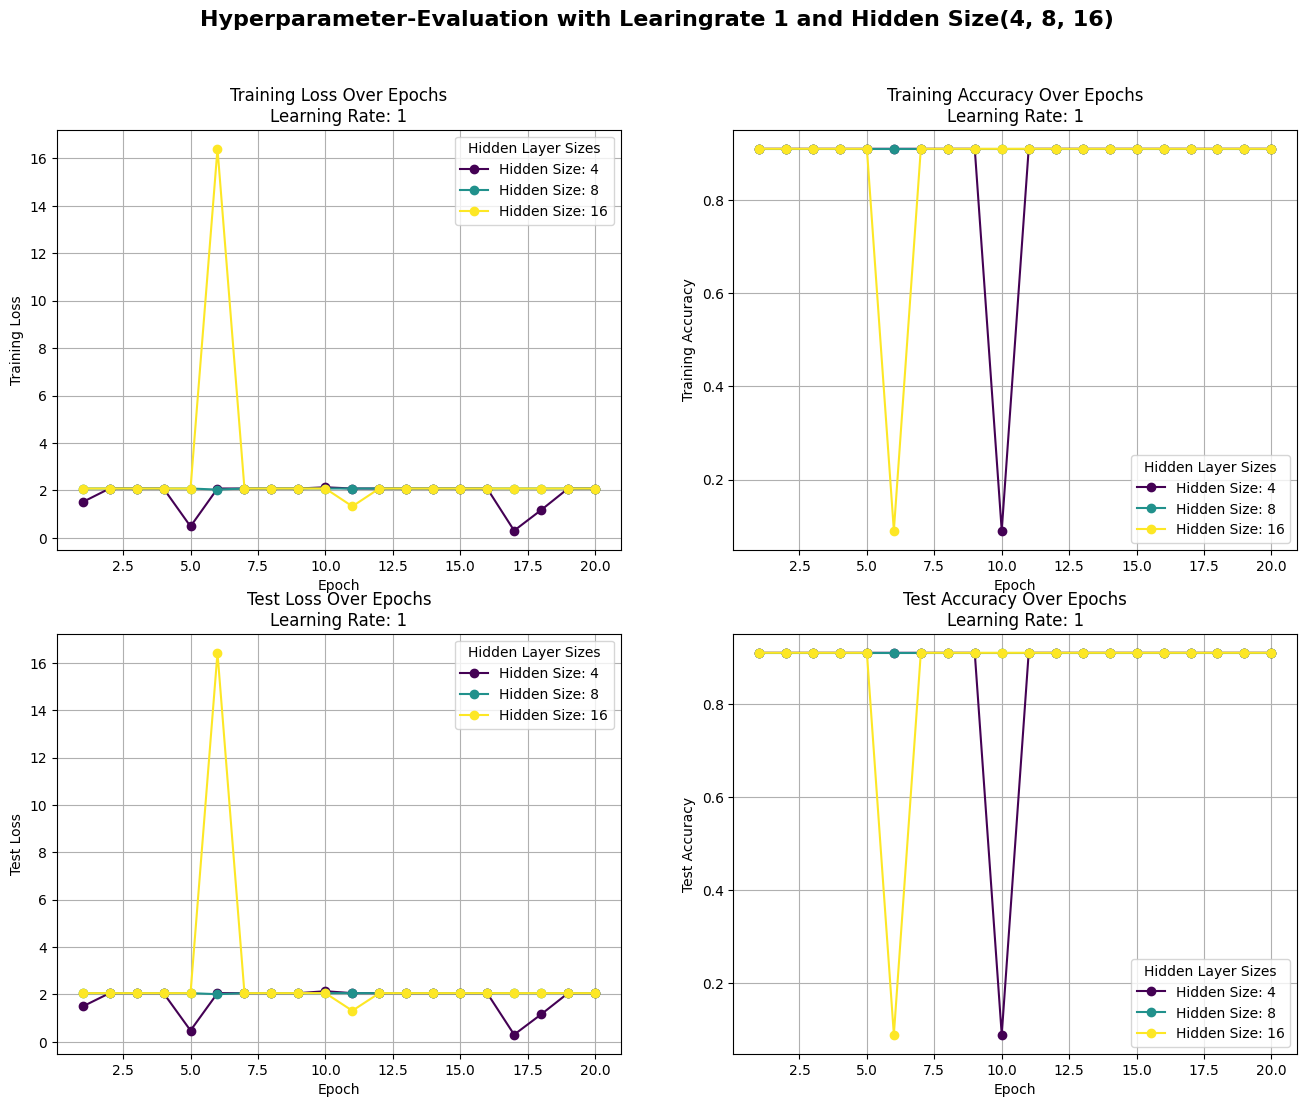

In [9]:
plot.show_evaluation_results(binary_evaluation_results)

## Modellleistungsanalyse

### Lernrate Einflüsse
- **Lernrate 0.01**: 
  - Geringer Trainingsverlust und hohe Genauigkeit
  - Stabiles und konvergierendes Training

- **Lernrate 0.1**: 
  - Höhere Verlustwerte und fluktuierende Genauigkeit
  - Weniger stabiles Training als bei 0.01

- **Lernrate 1**: 
  - Sehr hoher Verlust und instabile Genauigkeit
  - Anzeichen von Divergenz

### Einfluss der Größe der versteckten Schicht
- **16 Neuronen**: 
  - Bei Lernrate 0.01 beste Performance
  - Kann komplexere Muster erkennen

- **4 und 8 Neuronen**: 
  - Geringere Performance als 16 Neuronen bei Lernrate 0.01
  - Bei hoher Lernrate (1) kein klarer Vorteil

### Schlussfolgerungen
- Eine **niedrigere Lernrate** und **größere versteckte Schicht** führen zu besserer Modellperformance.
- Die Auswahl von Lernrate und Netzwerkarchitektur ist entscheidend für stabiles und effektives Training.

In [10]:
res.rank_results(binary_evaluation_results)

## Ranked Results

**Rank 1:** Learning Rate = 0.01, Hidden Layer Size = 16, Train Loss = 0.009, Train Accuracy = 99.74%, Test Loss = 0.023, Test Accuracy = 99.28%

**Rank 2:** Learning Rate = 0.01, Hidden Layer Size = 8, Train Loss = 0.012, Train Accuracy = 99.69%, Test Loss = 0.025, Test Accuracy = 99.22%

**Rank 3:** Learning Rate = 0.1, Hidden Layer Size = 16, Train Loss = 0.021, Train Accuracy = 99.34%, Test Loss = 0.043, Test Accuracy = 98.91%

**Rank 4:** Learning Rate = 0.01, Hidden Layer Size = 4, Train Loss = 0.027, Train Accuracy = 99.13%, Test Loss = 0.038, Test Accuracy = 98.70%

**Rank 5:** Learning Rate = 0.1, Hidden Layer Size = 8, Train Loss = 0.043, Train Accuracy = 98.75%, Test Loss = 0.058, Test Accuracy = 98.33%

**Rank 6:** Learning Rate = 0.1, Hidden Layer Size = 4, Train Loss = 0.045, Train Accuracy = 98.20%, Test Loss = 0.061, Test Accuracy = 97.87%

**Rank 7:** Learning Rate = 1, Hidden Layer Size = 4, Train Loss = 2.080, Train Accuracy = 90.96%, Test Loss = 2

## Aufgabe 5

## Trainingsmodell für kategoriale Klassifikation

### Modellstruktur und Leistungsbewertung
Gleich wie bei Aufgabe 3.


### Zusatzinformationen
- Funktionen für die Berechnung des Softmax-Kreuzentropieverlusts (`softmax_cross_entropy`) und der kategorialen Genauigkeit (`categorical_compute_accuracy`) sind notwendig.
- Diese Trainingsstruktur ist typisch für maschinelles Lernen bei kategorialen Klassifikationsaufgaben und unterstützt das Verständnis und die Optimierung des Modellverhaltens über die Zeit.

# Kostenfunktion (Loss Function)

Bei der Multi-Klassen-Klassifikation, bei der es mehr als zwei mögliche Klassenbezeichnungen gibt, ist die binäre Kreuzentropie (BCE) nicht mehr geeignet. Hier wird üblicherweise die Softmax-Cross-Entropie (SCE)-Verlustfunktion verwendet. Sie erweitert das Konzept der BCE für mehrere Klassen:

$$
SCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \cdot \log(\hat{y}_{i,c})
$$

Wobei:
- **N** die Anzahl der Beispiele im Datensatz ist,
- **C** die Anzahl der Klassen ist,
- **$y_{i,c}$** die One-Hot-Enkodierte Bezeichnung für Klasse c in Beispiel i ist (1 für die wahre Klasse, 0 für andere), und
- **$\hat{y}_{i,c}$** die vom Netzwerk vorhergesagte Wahrscheinlichkeit für Klasse c in Beispiel i ist (Ausgabe der Softmax-Aktivierungsfunktion).

SCE misst die Differenz zwischen den echten One-Hot-Enkodierten Bezeichnungen und der vorhergesagten Wahrscheinlichkeitsverteilung für jedes Beispiel. Die Minimierung dieses Verlusts führt dazu, dass das Modell den korrekten Klassen höhere Wahrscheinlichkeiten zuweist.

## Evaluationsfunktion

Die Funktion `categorical_compute_accuracy` berechnet die Genauigkeit (Accuracy) für kategoriale Klassifikation.

**Eingabe:**
- `predictions`: Ein $m \times n$ Matrix von Vorhersagewahrscheinlichkeiten.
- `labels`: Ein $m \times n$ Matrix von tatsächlichen Labels, one-hot encoded.

**Operationen:**
1. Konvertiere `predictions` und `labels` zu Vektoren der vorhergesagten bzw. tatsächlichen Klassen durch die Auswahl des Indexes mit der maximalen Wahrscheinlichkeit:
   
   $$
   \text{predicted\_class}_i = \underset{j}{\mathrm{argmax}}\ (\textit{predictions}_{ij})
   $$
   
   $$
   \text{actual\_class}_i = \underset{j}{\mathrm{argmax}}\ (\textit{labels}_{ij})
   $$
   
   wobei $i$ das Beispiel und $j$ die Klasse indiziert.

2. Berechne die Genauigkeit als den Durchschnitt der korrekt klassifizierten Beispiele:
   
   $$
   \text{Accuracy} = \frac{1}{m} \sum_{i=1}^{m} \mathbb{1}(\text{predicted\_class}_i = \text{actual\_class}_i)
   $$
   
   wobei $\mathbb{1}$ die Indikatorfunktion ist, die 1 zurückgibt, wenn die vorhergesagte Klasse mit der tatsächlichen Klasse übereinstimmt, andernfalls 0.

## Alternative Optionen

### Evaluierungsmetriken:

- **Kategorische Genauigkeit (Categorical Accuracy)**:
  - Diese Metrik misst den Anteil der korrekt klassifizierten Beispiele im Verhältnis zur Gesamtzahl der Beispiele.
  - Berechnung:
    $$
    \text{Categorical Accuracy} = \frac{1}{m} \sum_{i=1}^{m} \mathbb{1}(\text{predicted\_class}_i = \text{actual\_class}_i)
    $$
  - Hierbei sind $\text{predicted\_class}_i$ und $\text{actual\_class}_i$ die vorhergesagte bzw. tatsächliche Klasse des Beispiels $i$.

### Loss-Funktionen:

- **Kategorische Kreuzentropie (Categorical Cross-Entropy)**:
  - Diese Loss-Funktion eignet sich für die kategorische Klassifikation, wenn Ihre Labels direkt als Indizes vorliegen.
  - Berechnung:
    $$
    CCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \log(\hat{y}_{i,\text{true}})
    $$
  - Wobei $\hat{y}_{i,\text{true}}$ die vom Netzwerk vorhergesagte Wahrscheinlichkeit für die tatsächliche Klasse des Beispiels $i$ ist.

Die Verwendung dieser alternativen Metriken und Loss-Funktionen ermöglicht es Ihnen, die Leistung Ihres Modells in kategorischen Klassifikationsaufgaben effektiv zu bewerten und zu optimieren.


In [11]:
import Train_Models.Categorial_Train as ct

In [12]:
def one_hot_encode(labels, num_classes=None):
    if num_classes is None:
        num_classes = labels.max() + 1
    return np.eye(num_classes)[labels]

In [13]:
categorical_train_labels = one_hot_encode(train_labels)
categorical_test_labels = one_hot_encode(test_labels)

# Flatten the images for simplicity (28x28 to 784 pixel)
categorical_train_images = train_images.reshape(train_images.shape[0], -1)
categorical_test_images = test_images.reshape(test_images.shape[0], -1)

In [14]:
epochs = 20
batch_size = 64  # Example batch size
learning_rates = [0.01, 0.1, 1]
hidden_layer_sizes = [4, 8, 16]

# Call the function to evaluate all combinations
categorical_evaluation_results = ct.categorical_evaluate_combinations(
    categorical_train_images, categorical_train_labels, categorical_test_images, categorical_test_labels, epochs, batch_size, learning_rates, hidden_layer_sizes
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 2.1492995013243505, Test Loss: 2.148161418984509, Train Accuracy: 0.3801333333333333, Test Accuracy: 0.3863
Epoch 2, Train Loss: 2.0471516209287364, Test Loss: 2.045954441953119, Train Accuracy: 0.48855, Test Accuracy: 0.487
Epoch 3, Train Loss: 1.939041647866325, Test Loss: 1.9354865490012152, Train Accuracy: 0.5847166666666667, Test Accuracy: 0.5847
Epoch 4, Train Loss: 1.8722582432846608, Test Loss: 1.8736320661602148, Train Accuracy: 0.6775166666666667, Test Accuracy: 0.6761
Epoch 5, Train Loss: 1.8588510703149523, Test Loss: 1.856875843249719, Train Accuracy: 0.67785, Test Accuracy: 0.6787
Epoch 6, Train Loss: 1.829348670914009, Test Loss: 1.8303067091091696, Train Accuracy: 0.7043666666666667, Test Accuracy: 0.7
Epoch 7, Train Loss: 1.8193165682120838, Test Loss: 1.820823134399178, Train Accuracy: 0.72835, Test Accuracy: 0.7251
Epoch 8, Train Loss: 1.8095555904344103, Test Loss: 1.81263146718489

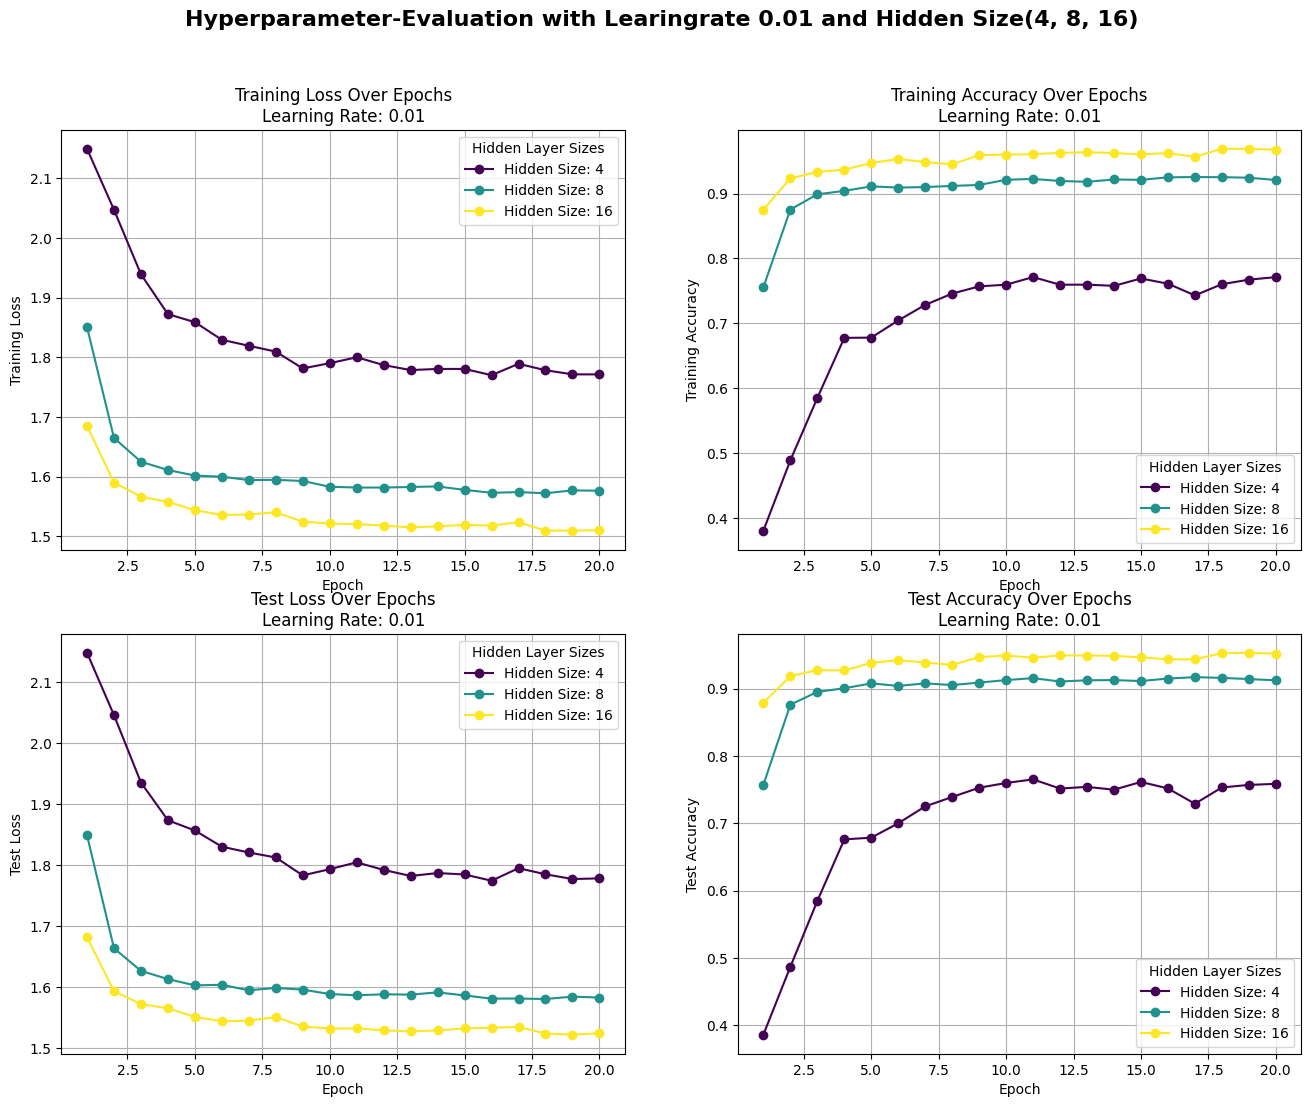

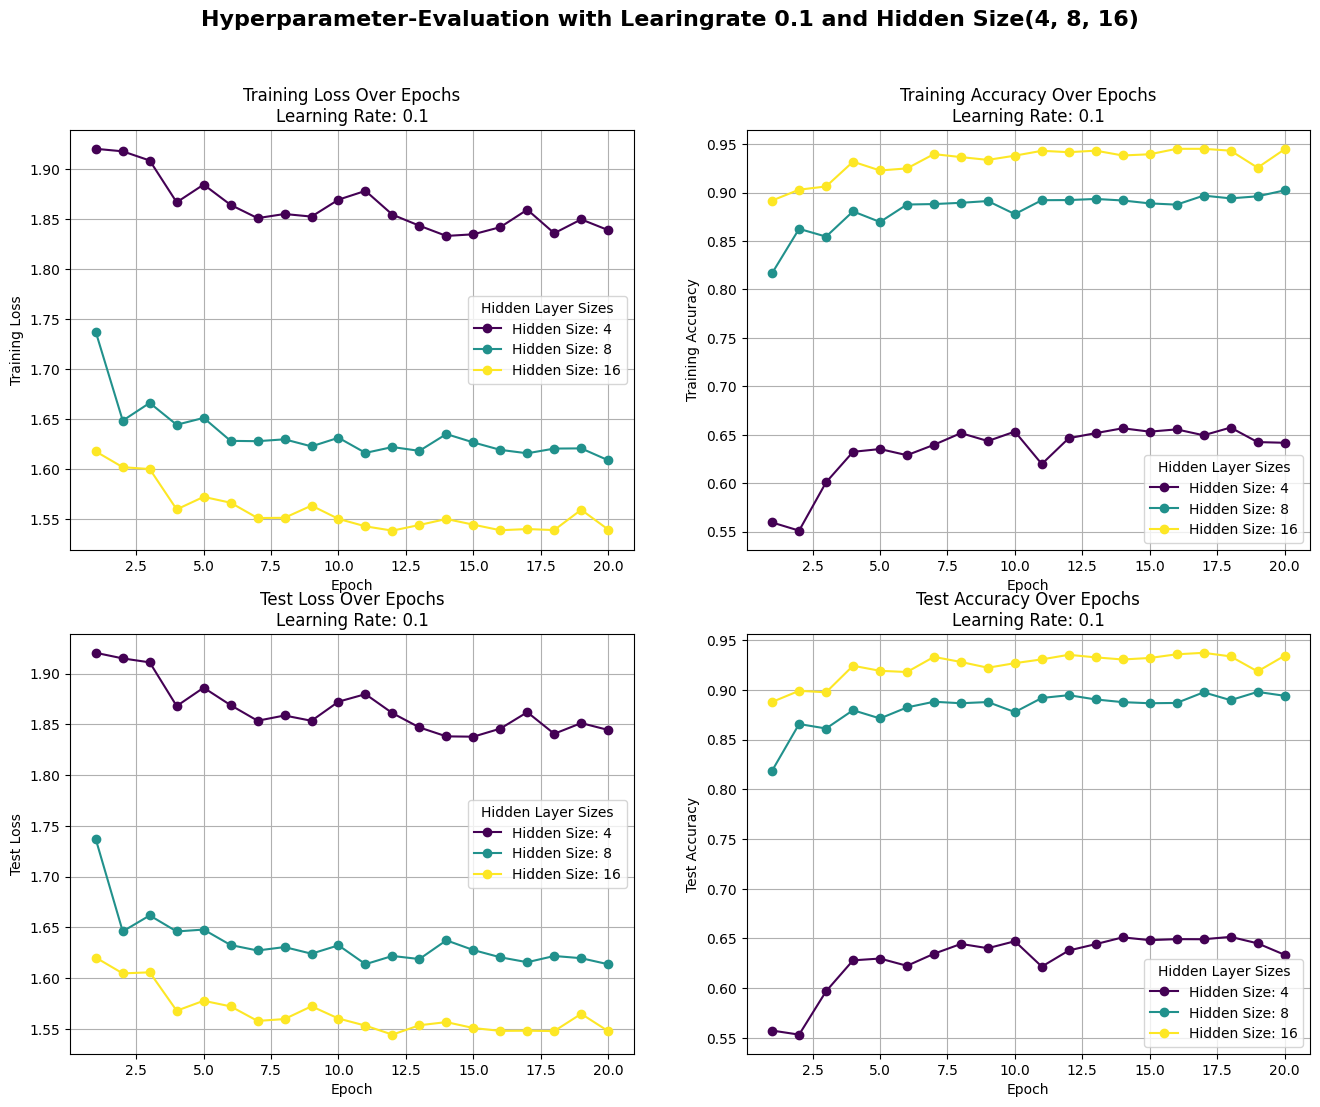

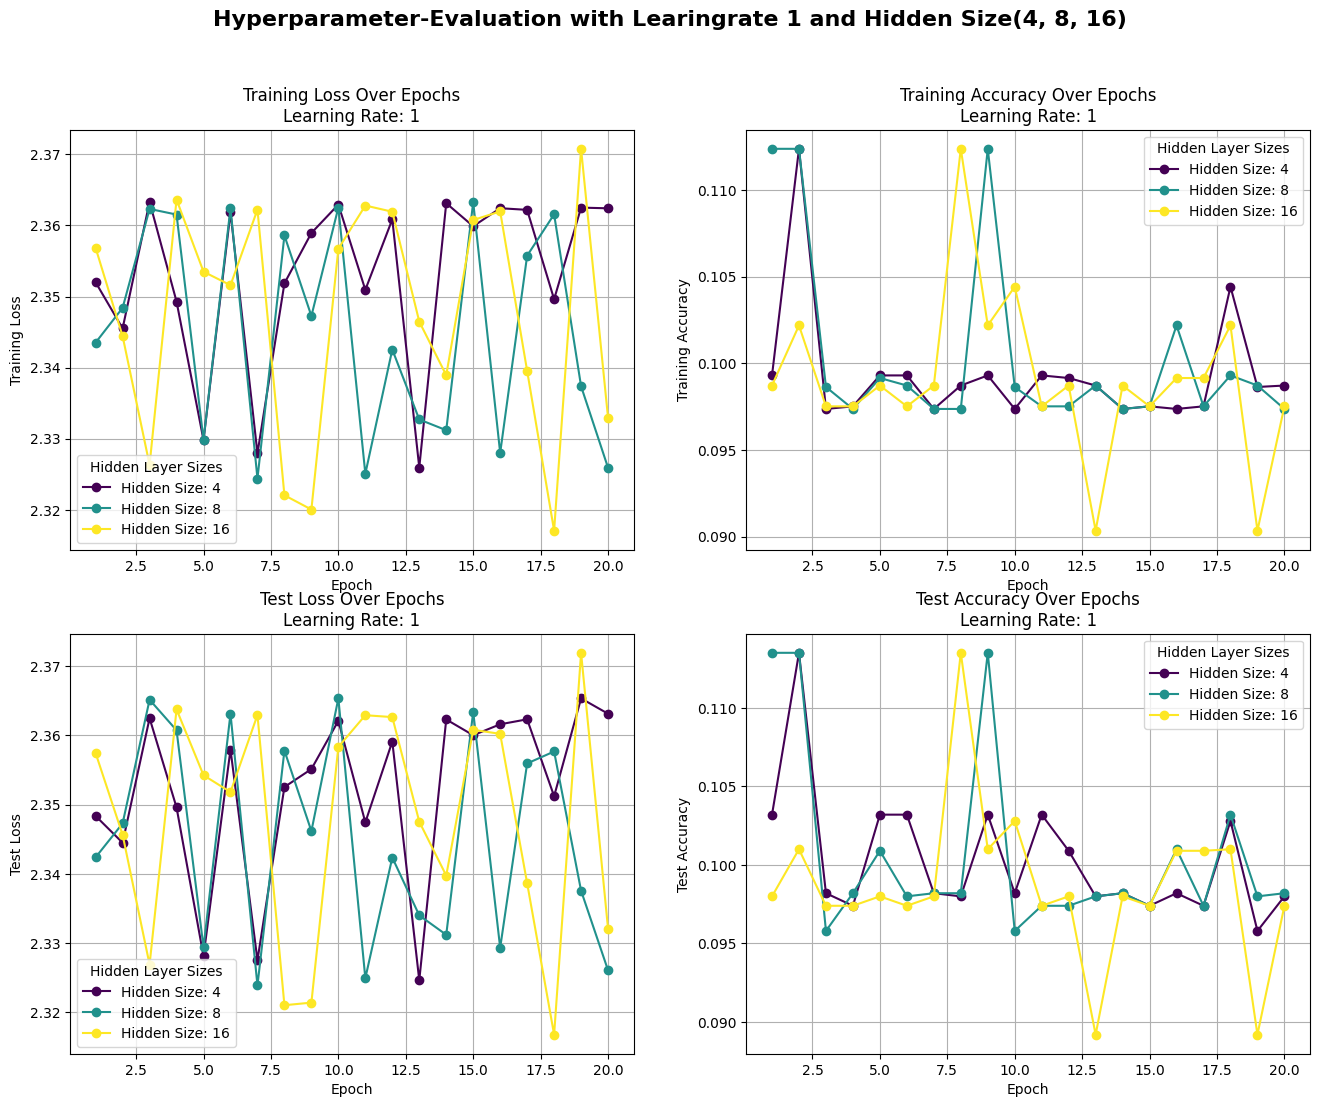

In [15]:
plot.show_evaluation_results(categorical_evaluation_results)

## Modellleistungsanalyse

### Einfluss der Lernrate
- **Lernrate 0.01**: 
  - Deutliche Verringerung des Trainingsverlustes für alle Modellgrößen
  - Stetiger Anstieg der Genauigkeit, mit Spitzenwerten für größere Modelle

- **Lernrate 0.1**: 
  - Schnelle Anfangsverbesserung, dann Plateau im Trainingsverlust
  - Zunehmende Genauigkeit ohne klare Überlegenheit größerer Modelle

- **Lernrate 1**: 
  - Sehr hohe Schwankungen im Trainingsverlust
  - Genauigkeit stark fluktuierend, mit Tendenz zur Instabilität

### Auswirkungen der Größe der versteckten Schicht
- **16 Neuronen**: 
  - Konsistent niedrigster Trainingsverlust bei Lernrate 0.01
  - Hohe Genauigkeit, aber mit abnehmender Verbesserungsraten über die Epochen

- **4 und 8 Neuronen**: 
  - Höherer Trainingsverlust als 16 Neuronen bei allen Lernraten
  - Genauigkeit verbessert sich, bleibt aber hinter 16 Neuronen zurück

### Schlussfolgerungen
- Eine **niedrigere Lernrate (0.01)** führt zu einer stetigen und zuverlässigen Modellverbesserung.
- **Größere versteckte Schichten** tendieren dazu, sowohl den Verlust zu minimieren als auch die Genauigkeit zu maximieren, wobei der marginale Nutzen mit zunehmender Epochenzahl abnimmt.
- Bei hohen Lernraten (0.1 und 1) ist die Modellgröße weniger ausschlaggebend für die Leistung.

In [16]:
res.rank_results(categorical_evaluation_results)

## Ranked Results

**Rank 1:** Learning Rate = 0.01, Hidden Layer Size = 16, Train Loss = 1.510, Train Accuracy = 96.78%, Test Loss = 1.524, Test Accuracy = 95.18%

**Rank 2:** Learning Rate = 0.1, Hidden Layer Size = 16, Train Loss = 1.540, Train Accuracy = 94.47%, Test Loss = 1.548, Test Accuracy = 93.42%

**Rank 3:** Learning Rate = 0.01, Hidden Layer Size = 8, Train Loss = 1.576, Train Accuracy = 92.10%, Test Loss = 1.583, Test Accuracy = 91.23%

**Rank 4:** Learning Rate = 0.1, Hidden Layer Size = 8, Train Loss = 1.609, Train Accuracy = 90.24%, Test Loss = 1.614, Test Accuracy = 89.40%

**Rank 5:** Learning Rate = 0.01, Hidden Layer Size = 4, Train Loss = 1.771, Train Accuracy = 77.12%, Test Loss = 1.778, Test Accuracy = 75.86%

**Rank 6:** Learning Rate = 0.1, Hidden Layer Size = 4, Train Loss = 1.839, Train Accuracy = 64.17%, Test Loss = 1.844, Test Accuracy = 63.36%

**Rank 7:** Learning Rate = 1, Hidden Layer Size = 8, Train Loss = 2.326, Train Accuracy = 9.74%, Test Loss = 2.

# Zusammenfassung der Projektergebnisse

## Aufgabe 1: Datenvorbereitung
- **Datenquelle**: Nutzung des MNIST-Datensatzes, bereitgestellt durch das `torchvision` Paket.
- **Datenstruktur**: Der Datensatz besteht aus 60.000 Trainingsbildern und 10.000 Testbildern, jeweils 28x28 Pixel groß.
- **Visualisierung und Analyse**: Einsatz von `matplotlib` zur Darstellung der Datenverteilung und Visualisierung einiger Beispiele von handgeschriebenen Ziffern.

## Aufgabe 2: Implementierung des Linear Layers
- **Klasse `LinearLayer`**: Entwicklung einer Klasse für lineare Transformationen inklusive Methoden für den Forward-Pass, Backward-Pass und Parameter-Updates.
- **Testergebnisse**: Durchführung von Unittests, die die korrekte Funktionalität bestätigen, insbesondere wurde ein Szenario mit zwei Knoten erfolgreich geprüft.

## Aufgabe 3: Aufbau des neuronalen Netzwerks
- **Netzwerkstruktur**: Konfiguration eines einfachen neuronalen Netzwerks mit einem Hidden Layer für binäre Klassifikation.
- **Trainingsvorbereitung**: Implementierung eines Trainingsloops; spezifische Trainingsresultate wurden in dieser Phase noch nicht generiert.

## Aufgabe 4: Experimente und Analyse
- **Hyperparameter-Experimente**: Durchführung von Tests mit verschiedenen Lernraten (0.01 bis 1) und Hidden Layer-Größen (4, 8, 16).
- **Beobachtungen**: Beste Ergebnisse bei einer Lernrate von 0.01 und einem Hidden Layer mit 16 Knoten.
- **Diskussion**: Niedrigere Lernraten förderten die Konvergenz; größere Hidden Layers erhöhten die Modellkapazität, wobei das Risiko der Überanpassung besteht.

## Aufgabe 5: Erweiterung des Modells für kategoriale Klassifikation
- **Netzwerkerweiterung**: Aufbau eines Netzwerks mit drei Hidden Layern und zehn Outputs zur Klassifikation aller Ziffern.
- **Kostenfunktion**: Anwendung der Softmax-Cross-Entropie, ideal für Multi-Klassen-Klassifikationsprobleme.
- **Trainingsloop Ergebnisse**:
  - **Lernraten**: Variierung zwischen 0.01 und 1; stabilste und effektivste Ergebnisse bei 0.01.
  - **Hidden Layer-Größen**: Experimente mit 4, 8, 16 Knoten; beste Ergebnisse mit 16 Knoten in Bezug auf die Genauigkeit der Klassifikation.
  - **Genauigkeit**: Höchste Genauigkeit erreicht mit der Konfiguration Lernrate 0.01 und Hidden Layer-Größe 16.
- **Evaluationsfunktion**: Verwendung der kategorialen Genauigkeit, die den Prozentsatz der korrekt klassifizierten Bilder misst.
